### <font color=blue> Import relevant libraries </font>

The purpose of this hands-on session is to show an example of the classification (anomaly detection) in the high energy physics.
The principle and methodology used in this example is not restricted in HEP only. It can be used for all the 2-category (good-bad, signal-background) classification.

Signal: the events you want to keep
Background: the events you want to discard
Target: separate the signal and background as much as possible, keep most of the signal and reject most of the background.
Of course this cannot be 100% archieved, let's see what ML can do.


In [1]:
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#Skip this #Run, click the link, sign in Google, then copy back the link, so that you can access your own datasets

In [3]:
#ls 


#You should see drive/ then that means you can access the datasets in your google drive

## <font color=blue> Read in Data </font>
read in data from csv or txt file (comma separated values, can be read by MS excel as well)


In [4]:
signal = pd.read_csv('/Users/mukesh/Box/ML-xifeng/Signal.txt')
background = pd.read_csv('/Users/mukesh/Box/ML-xifeng/Background.txt')

signal.shape, background.shape

((5451, 104), (87952, 104))

The signal has 5.4k rows, background has 88k rows (events) and 104 columns

## <font color=blue> Data Exploration </font> 
##### After reading in the data, it is normal to view it, get a statistical description, check for duplicates, missing values, NaNs etc. So we do exactly that here.

In [5]:
signal.head()

,Row,ldvtxsump,subvtxsum,dsumpt2,npvx,mu,weight,metsig,met,tmet,...,sjpt,dphij1met,dphij1met.1,dphisjmet,pthard,pthard20,run,event,lb,Target
0,2,16.870452,14.312972,2.557481,5,18,8.084000e-10,2.660426,43.365384,24.603552,...,0.000000,1.131433,-1.000000,-1.000000,47.275539,47.275537,284500,737,19,1
1,3,260.546720,92.251968,168.294750,15,18,8.065000e-10,2.662552,44.565367,35.416921,...,0.000000,3.085110,-1.000000,-1.000000,42.386933,42.386936,284500,1266,19,1
2,5,18765.076000,83.766311,18681.309000,13,26,3.847000e-10,5.038403,130.763900,99.355959,...,0.000000,2.859739,2.859739,-1.000000,136.525650,136.525650,284500,352,27,1
3,8,10.168809,93.514030,-83.345220,13,18,8.191000e-10,5.310796,101.883520,53.358470,...,0.000000,3.034222,3.034222,-1.000000,100.272850,100.272860,284500,750,19,1
4,9,90.716598,173.481110,-82.764510,13,28,6.457000e-10,3.311737,49.094453,24.703150,...,29.840523,3.120152,-1.000000,3.120152,59.336023,59.336022,284500,1739,29,1


In [6]:
background.head()

,Row,ldvtxsump,subvtxsum,dsumpt2,npvx,mu,weight,metsig,met,tmet,...,sjpt,dphij1met,dphij1met.1,dphisjmet,pthard,pthard20,run,event,lb,Target
0,5,68.171386,116.299170,-48.127790,15,19,1,3.742974,46.865086,0,...,0.00000,1.002007,-1.000000,-1.000000,58.102621,58.102621,276262,745880.0,72,0
1,50,70.434349,53.082145,17.352203,14,19,1,2.163851,24.719682,0,...,0.00000,2.972754,2.972754,-1.000000,25.849017,25.849018,276262,52243990.0,125,0
2,76,129.635780,304.366300,-174.730500,13,19,1,4.012014,50.367399,0,...,21.82738,3.047049,-1.000000,3.047049,63.869550,63.869549,276262,31795530.0,105,0
3,109,8.733752,80.565513,-71.831760,15,17,1,2.320896,21.204170,0,...,0.00000,1.685184,-1.000000,-1.000000,20.478816,20.478817,276262,293559130.0,295,0
4,172,1.933064,80.712577,-78.779510,17,18,1,2.123608,19.831506,0,...,0.00000,0.644225,-1.000000,-1.000000,17.078363,17.078363,276262,117978410.0,168,0


## <font color=blue> Duplicates </font>
Remove any lines which are totally identical

In [7]:
signal.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5446    False
5447    False
5448    False
5449    False
5450    False
Length: 5451, dtype: bool

In [8]:
background.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
87947    False
87948    False
87949    False
87950    False
87951    False
Length: 87952, dtype: bool

Removed duplicated events (rows)

## <font color=blue> Missing Values </font>
Using the isnull() function we scan through the whole data set for any missing values. An output of '**False**' means we don't have missing values and an output of '**True**' means we do.

In [9]:
signal.isnull().values.any()

False

In [10]:
background.isnull().values.any()

False

## <font color=blue> Statistical Description </font>

In [ ]:
pd.concat([signal.describe(include='all'), signal.dtypes.to_frame().T])

In [2]:
##<font color=red> Staristical Inference </font>

In [12]:
pd.concat([background.describe(include='all'), background.dtypes.to_frame().T])

,Row,ldvtxsump,subvtxsum,dsumpt2,npvx,mu,weight,metsig,met,tmet,...,sjpt,dphij1met,dphij1met.1,dphisjmet,pthard,pthard20,run,event,lb,Target
count,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,...,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0,87952.0
mean,1743723.742655,1040.350585,199.857069,840.493531,16.922037,31.094108,1.0,2.900248,43.786449,0.0,...,7.101795,2.042765,0.676435,-0.191925,44.528379,44.529051,321989.85184,1514314739.845029,497.334603,0.0
std,1035689.04538,92529.652039,8967.308925,92962.620534,5.940286,12.067966,0.0,0.9033,17.286522,0.0,...,12.29806,0.93127,1.753134,1.402878,21.944712,21.970076,16383.497719,977220303.37497,324.433509,0.0
min,5.0,0.539046,-99.0,-2596289.0,1.0,6.0,1.0,2.000003,16.99803,0.0,...,0.0,0.000032,-1.0,-1.0,0.387975,0.387975,276262.0,400610.0,6.0,0.0
25%,766439.25,64.921278,73.765325,-55.455633,13.0,22.0,1.0,2.265199,32.237132,0.0,...,0.0,1.323962,-1.0,-1.0,30.454894,30.45174,306451.0,731020397.5,249.0,0.0
50%,1754076.5,127.88754,107.818095,21.134017,16.0,29.0,1.0,2.630268,39.596452,0.0,...,0.0,2.356929,0.124984,-1.0,40.641234,40.636886,329835.0,1316000000.0,425.0,0.0
75%,2656163.25,311.90216,160.200795,192.93262,21.0,38.0,1.0,3.240619,50.618721,0.0,...,20.338278,2.836805,2.632574,0.408466,54.046152,54.04744,337176.0,2151000000.0,678.0,0.0
max,3490794.0,25182994.0,2599770.0,25182911.0,46.0,68.0,1.0,18.623907,552.67929,0.0,...,92.482209,3.141577,3.141577,3.141559,608.46831,608.46831,340453.0,4294000000.0,2596.0,0.0
0,int64,float64,float64,float64,int64,int64,int64,float64,float64,int64,...,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64


##### If there were any missing values, we would then have to decide how to best fill them in. The following articles discuss some standard techniques for dealing with missing values
1. https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
2. https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

##<font color=blue>Preselection </font>
Select the necessary features for your particular study, reduce the size of the sample

In [13]:
presignal=signal[['N_j_centr','metsig','ptyy','dphiyy','metsighar','dsumpt2','dphifjmet']]
prebackground=background[['N_j_centr','metsig','ptyy','dphiyy','metsighar','dsumpt2','dphifjmet']]
presignal.shape, prebackground.shape,
presignal.head(),prebackground.head()


(   N_j_centr    metsig        ptyy    dphiyy  metsighar       dsumpt2  \
 0          0  2.660426   47.275539  2.805089   2.660426      2.557481   
 1          1  2.662552   36.681226  2.982673   2.662552    168.294750   
 2          3  5.038403  165.778680  1.934499   5.038403  18681.309000   
 3          0  5.310796    9.228163  3.130039   5.304592    -83.345220   
 4          1  3.311737   23.315707  2.597993   2.873845    -82.764510   
 
    dphifjmet  
 0  -1.000000  
 1   2.252122  
 2  -1.000000  
 3   3.075746  
 4   2.649973  ,
    N_j_centr    metsig       ptyy    dphiyy  metsighar     dsumpt2  dphifjmet
 0          0  3.742974  58.102621  2.683232   4.103208  -48.127790  -1.000000
 1          0  2.163851   7.428614  3.138233   2.163851   17.352203   2.972754
 2          0  4.012014  42.400460  2.115790   1.363079 -174.730500  -1.000000
 3          0  2.320896  20.478816  2.524142   2.753184  -71.831760  -1.000000
 4          0  2.123608  17.078363  2.778592   1.019351  -78.7

Select events with feature metsig>3.5, reduce those events you don't want in this study using your knowledge.

In [14]:
presignal=presignal[presignal['metsig'].between(3.5,100,inclusive=False)]
prebackground=prebackground[prebackground['metsig'].between(3.5,100,inclusive=False)]
presignal.shape, prebackground.shape,presignal.head(),prebackground.head()


((1310, 7),
 (16361, 7),
    N_j_centr    metsig        ptyy    dphiyy  metsighar       dsumpt2  \
 2          3  5.038403  165.778680  1.934499   5.038403  18681.309000   
 3          0  5.310796    9.228163  3.130039   5.304592    -83.345220   
 5          0  3.694666   21.091377  3.076935   3.930578    -30.135440   
 7          0  3.734231   53.552043  2.782538   3.734231      2.350037   
 8          2  4.295315  258.984530  2.336657   4.295315   8801.845400   
 
    dphifjmet  
 2  -1.000000  
 3   3.075746  
 5   2.887110  
 7   2.846276  
 8  -1.000000  ,
     N_j_centr    metsig       ptyy    dphiyy  metsighar    dsumpt2  dphifjmet
 0           0  3.742974  58.102621  2.683232   4.103208  -48.12779  -1.000000
 2           0  4.012014  42.400460  2.115790   1.363079 -174.73050  -1.000000
 5           1  3.867582  69.034015  0.826966   3.867582  194.59181  -1.000000
 7           1  3.621729  60.853445  1.957118   1.708448 -266.85190   1.736145
 34          0  3.591680  83.477125  

##<font color=blue> 1D Distributions </font>
Let's look at the 1D distribution

(None, None, None, None, None, None, None)

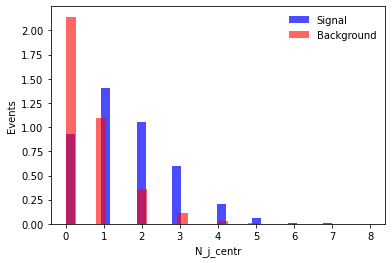

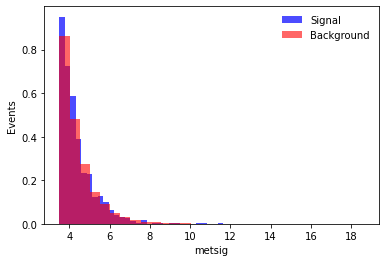

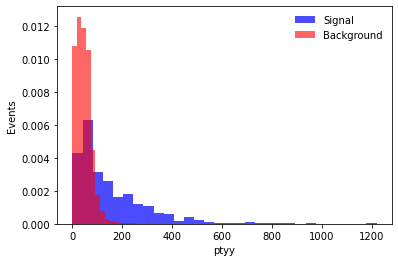

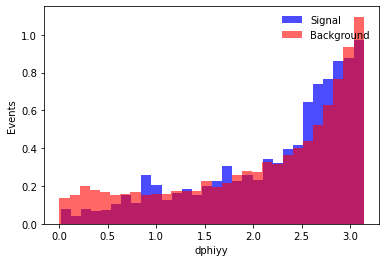

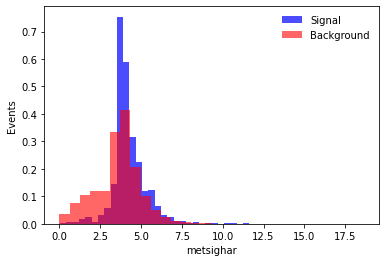

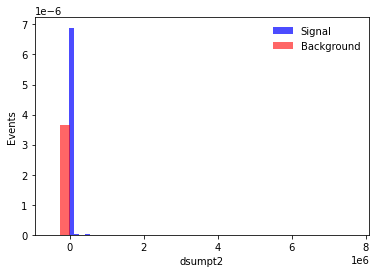

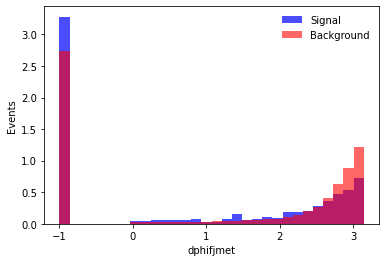

In [15]:
def draw1D(feature):
   sigtmp=presignal[feature]
   bkgtmp=prebackground[feature]
   plt.figure()
   plt.hist(sigtmp, bins=30, color='blue', label='Signal',
          alpha=.7, density=True)
   plt.hist(bkgtmp, bins=30, color='red', label='Background',
         alpha=.6, density=True)
   plt.legend(loc='upper right', frameon=False)
   plt.ylabel('Events')
   plt.xlabel(feature)
   plt.savefig(feature+'.png')

draw1D('N_j_centr'),draw1D('metsig'),draw1D('ptyy'),draw1D('dphiyy'),draw1D('metsighar'),draw1D('dsumpt2'),draw1D('dphifjmet')

## <font color=blue> Correlation Matrix </font>
A correlation matrix allows us to view the relationship between the features of the data. Any highly correlated features must be investigated to determine if they must be removed or not. We must be careful about removing or engineering features becasue it can cause information loss or introduce bias.

In [16]:
def Correlation_Matrix(X,Y):
    
    corrS = X.corr()
    corrB = Y.corr()
    cmap = cmap =sns.diverging_palette(5, 250, as_cmap=True)
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]

    S_corrmatrix = corrS.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    B_corrmatrix = corrB.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    return S_corrmatrix, B_corrmatrix

matrixS, matrixB = Correlation_Matrix(presignal,prebackground)

In [17]:
matrixS

,N_j_centr,metsig,ptyy,dphiyy,metsighar,dsumpt2,dphifjmet
N_j_centr,1.00,0.23,0.49,-0.46,0.29,0.04,-0.14
metsig,0.23,1.00,0.51,-0.38,0.84,0.05,0.02
ptyy,0.49,0.51,1.00,-0.78,0.52,0.20,-0.12
dphiyy,-0.46,-0.38,-0.78,1.00,-0.41,-0.14,0.10
metsighar,0.29,0.84,0.52,-0.41,1.00,0.05,-0.01
dsumpt2,0.04,0.05,0.20,-0.14,0.05,1.00,0.01
dphifjmet,-0.14,0.02,-0.12,0.10,-0.01,0.01,1.00


In [18]:
matrixB

,N_j_centr,metsig,ptyy,dphiyy,metsighar,dsumpt2,dphifjmet
N_j_centr,1.00,-0.04,0.24,-0.12,0.13,0.00,-0.03
metsig,-0.04,1.00,0.20,-0.21,0.32,0.02,-0.06
ptyy,0.24,0.20,1.00,-0.68,0.11,0.02,-0.28
dphiyy,-0.12,-0.21,-0.68,1.00,-0.11,-0.01,0.28
metsighar,0.13,0.32,0.11,-0.11,1.00,0.02,0.05
dsumpt2,0.00,0.02,0.02,-0.01,0.02,1.00,-0.01
dphifjmet,-0.03,-0.06,-0.28,0.28,0.05,-0.01,1.00


## <font color=blue>Label the signal and background</font>

In [19]:
targetsignal= pd.DataFrame(columns=['target'], index=range(len(presignal)))

targetsignal['target']=1
targetsignal

,target
0,1
1,1
2,1
3,1
4,1
...,...
1305,1
1306,1
1307,1
1308,1


In [20]:
targetbackground= pd.DataFrame(columns=['target'], index=range(len(prebackground)))

targetbackground['target']=0
targetbackground

,target
0,0
1,0
2,0
3,0
4,0
...,...
16356,0
16357,0
16358,0
16359,0


Now we merge the signal & background dataset to 1 dataset, they will be differentiated by the column "Target".
Then we split the dataset to train and test dataset. Train data set is used to fit/setup the ML classifier. Test dataset is used to valid the training and to examine the overfitting/overtraining.

In [21]:
from sklearn import preprocessing

# Join and Shuffle samples
#feature -data1  target -target
data1 = pd.concat([presignal,prebackground],axis=0)
target = pd.concat([targetsignal,targetbackground],axis=0)
data1.reset_index(inplace=True, drop=True)
target.reset_index(inplace=True, drop=True)

#data1 = shuffle(data1)

# Train_Test Split

data_train1, data_test1, target_train1, target_test1 = train_test_split(data1, target, 
              stratify=target,random_state=11, test_size=0.50)



# Convert data to numpy arrays
np_data_train1 = data_train1.values
np_data_test1 = data_test1.values
np_target_train1 = target_train1.values
np_target_test1 = target_test1.values


In [22]:
data_train1.shape, data_test1.shape, target_train1.shape, target_test1.shape

((8835, 7), (8836, 7), (8835, 1), (8836, 1))

## <font color=blue>Train models</font>
We train the same random forest classifer but with different N Trees and depthm, see what is the difference
A deep neural net method (Multi-layer perceptron, MLP) is used for comparison

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

gb_clf1 = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1,
                          max_depth=2,random_state=10, loss='deviance')
%time gb_clf1.fit(data_train1, target_train1.values.ravel()) 

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1,
                          max_depth=2,random_state=10, loss='deviance')
%time gb_clf2.fit(data_train1, target_train1.values.ravel()) 

gb_clf3 = GradientBoostingClassifier(n_estimators=800, learning_rate=0.1,
                          max_depth=4,random_state=10, loss='deviance')
%time gb_clf3.fit(data_train1, target_train1.values.ravel()) 

#To compare with an MLP (DNN) 
mlp_clf = MLPClassifier(hidden_layer_sizes=(30,30,30),activation="relu",random_state=1,verbose=True)

%time mlp_clf.fit(data_train1, target_train1.values.ravel())





CPU times: user 4.09 s, sys: 47.9 ms, total: 4.14 s
Wall time: 4.28 s
CPU times: user 210 ms, sys: 2.73 ms, total: 213 ms
Wall time: 221 ms
CPU times: user 15.7 s, sys: 254 ms, total: 16 s
Wall time: 17.8 s
Iteration 1, loss = 6.59284172
Iteration 2, loss = 1.72122394
Iteration 3, loss = 1.00663583
Iteration 4, loss = 1.76498282
Iteration 5, loss = 1.53452239
Iteration 6, loss = 1.53661860
Iteration 7, loss = 1.05310325
Iteration 8, loss = 1.89046778
Iteration 9, loss = 1.01488051
Iteration 10, loss = 1.17305705
Iteration 11, loss = 1.71929522
Iteration 12, loss = 0.78130931
Iteration 13, loss = 0.67367312
Iteration 14, loss = 2.06787863
Iteration 15, loss = 1.61958288
Iteration 16, loss = 1.71022905
Iteration 17, loss = 0.98851466
Iteration 18, loss = 0.38621874
Iteration 19, loss = 1.43277194
Iteration 20, loss = 2.34775968
Iteration 21, loss = 1.42035095
Iteration 22, loss = 2.04219873
Iteration 23, loss = 1.86128469
Iteration 24, loss = 1.92588003
Iteration 25, loss = 1.42689383
It

MLPClassifier(hidden_layer_sizes=(30, 30, 30), random_state=1, verbose=True)

In [24]:

def response(label, pred):
    tsig = []
    tbkg = []
    for i in range(len(label)):
        if(label[i] == 1.0):
            tsig.append(pred[i])
        elif(label[i] == 0.0):
            tbkg.append(pred[i])
            
    return tsig, tbkg
   #giving each dataset (test, training) a score from different classifier 
pred_probabilities1 = gb_clf1.predict_proba(data_test1)[:,1]
pred_probabilities2 = gb_clf2.predict_proba(data_test1)[:,1]
pred_probabilities3 = gb_clf3.predict_proba(data_test1)[:,1]
pred_probabilitiesMLP = mlp_clf.predict_proba(data_test1)[:,1]

signal1_test, background1_test = response(np_target_test1, pred_probabilities1)
signal2_test, background2_test = response(np_target_test1, pred_probabilities2)
signal3_test, background3_test = response(np_target_test1, pred_probabilities3)
signalMLP_test, backgroundMLP_test = response(np_target_test1, pred_probabilitiesMLP)


pred_probabilities1train = gb_clf1.predict_proba(data_train1)[:,1]
pred_probabilities2train = gb_clf2.predict_proba(data_train1)[:,1]
pred_probabilities3train = gb_clf3.predict_proba(data_train1)[:,1]
pred_probabilitiesMLPtrain = mlp_clf.predict_proba(data_train1)[:,1]

#the evaluation of each event from three different classifer

signal1_train, background1_train = response(np_target_train1, pred_probabilities1train)
signal2_train, background2_train = response(np_target_train1, pred_probabilities2train)
signal3_train, background3_train = response(np_target_train1, pred_probabilities3train)
signalMLP_train, backgroundMLP_train = response(np_target_train1, pred_probabilitiesMLPtrain)




## <font color=blue>Look at the BDT and MLP output score</font>

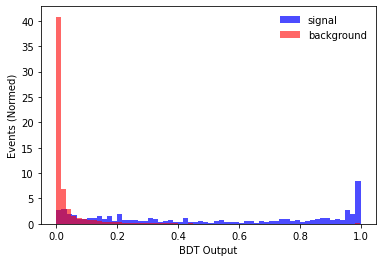

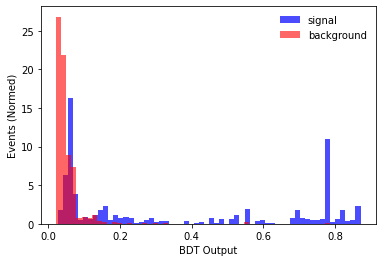

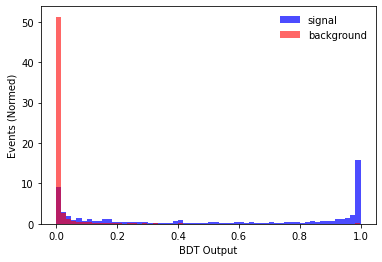

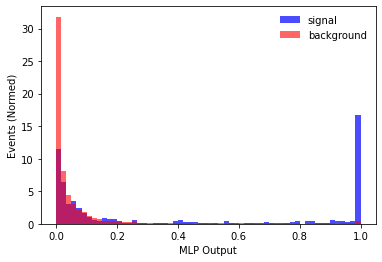

In [25]:


plt.figure()    
plt.hist(signal1_test, bins=60, color='blue', label='signal',
          alpha=.7, density=True)
plt.hist(background1_test, bins=60, color='red', label='background',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_Val1.png')

plt.figure()    
plt.hist(signal2_test, bins=60, color='blue', label='signal',
          alpha=.7, density=True)
plt.hist(background2_test, bins=60, color='red', label='background',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_Val2.png')

plt.figure()    
plt.hist(signal3_test, bins=60, color='blue', label='signal',
          alpha=.7, density=True)
plt.hist(background3_test, bins=60, color='red', label='background',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_Val3.png')

plt.figure()    
plt.hist(signalMLP_test, bins=60, color='blue', label='signal',
          alpha=.7, density=True)
plt.hist(backgroundMLP_test, bins=60, color='red', label='background',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('MLP Output')
#plt.yscale('log')
plt.savefig('BDT_Output_ValMLP.png')


Here we look at for the signal and background, how are their BDT scores. It seems they are well separated.

Do the same thing for the training, compare the training with test

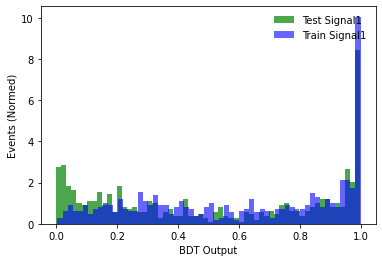

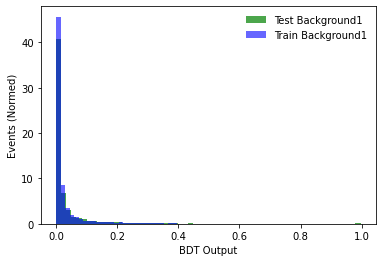

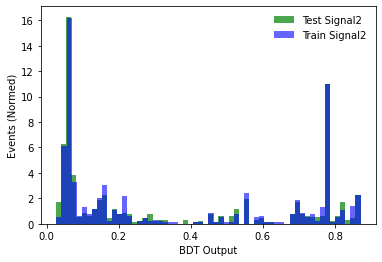

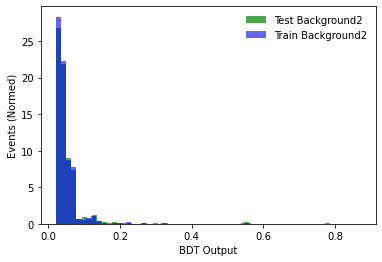

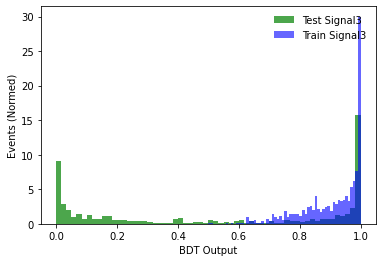

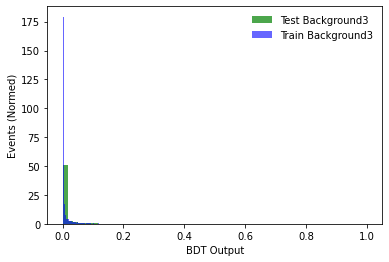

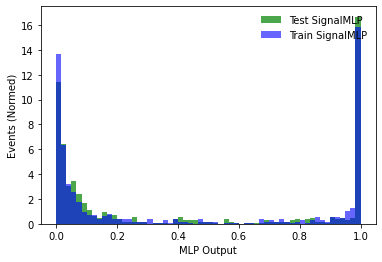

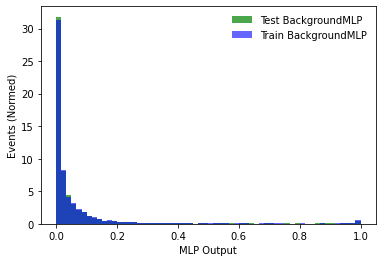

In [26]:


plt.figure()     
plt.hist(signal1_test, bins=60, color='green', label='Test Signal1',
          alpha=.7, density=True)
plt.hist(signal1_train, bins=60, color='blue', label='Train Signal1',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_sig1.png')
plt.figure()     
plt.hist(background1_test, bins=60, color='green', label='Test Background1',
          alpha=.7, density=True)
plt.hist(background1_train, bins=60, color='blue', label='Train Background1',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_bkg1.png')
####################
plt.figure()     
plt.hist(signal2_test, bins=60, color='green', label='Test Signal2',
          alpha=.7, density=True)
plt.hist(signal2_train, bins=60, color='blue', label='Train Signal2',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_sig2.png')
plt.figure()     
plt.hist(background2_test, bins=60, color='green', label='Test Background2',
          alpha=.7, density=True)
plt.hist(background2_train, bins=60, color='blue', label='Train Background2',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_bkg2.png')
######################
plt.figure()     
plt.hist(signal3_test, bins=60, color='green', label='Test Signal3',
          alpha=.7, density=True)
plt.hist(signal3_train, bins=60, color='blue', label='Train Signal3',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_sig3.png')
plt.figure()     
plt.hist(background3_test, bins=60, color='green', label='Test Background3',
          alpha=.7, density=True)
plt.hist(background3_train, bins=60, color='blue', label='Train Background3',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('BDT Output')
#plt.yscale('log')
plt.savefig('BDT_Output_bkg3.png')
######################
plt.figure()     
plt.hist(signalMLP_test, bins=60, color='green', label='Test SignalMLP',
          alpha=.7, density=True)
plt.hist(signalMLP_train, bins=60, color='blue', label='Train SignalMLP',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('MLP Output')
#plt.yscale('log')
plt.savefig('MLP_Output_sigMLP.png')

plt.figure()     
plt.hist(backgroundMLP_test, bins=60, color='green', label='Test BackgroundMLP',
          alpha=.7, density=True)
plt.hist(backgroundMLP_train, bins=60, color='blue', label='Train BackgroundMLP',
         alpha=.6, density=True)
plt.legend(loc='upper right', frameon=False)
plt.ylabel('Events (Normed)')
plt.xlabel('MLP Output')
#plt.yscale('log')
plt.savefig('MLP_Output_bkgMLP.png')


In [27]:
#for a given cut, label the test / train sample as measured signal or background
data_test_pred1 = gb_clf1.predict(data_test1)
data_train_pred1 = gb_clf1.predict(data_train1)

print("Accuracy score (training): {0:.3f}".format(gb_clf1.score(data_train1, target_train1)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf1.score(data_test1, target_test1)))
print("Confusion Matrix:")
print(confusion_matrix(target_test1, data_test_pred1))
print()
#print("Classification Report")
#print(classification_report(target_test1, data_test_pred1))



Accuracy score (training): 0.965
Accuracy score (validation): 0.951
Confusion Matrix:
[[8072  109]
 [ 328  327]]



## <font color=blue> ROC </font>

<Figure size 144x144 with 0 Axes>

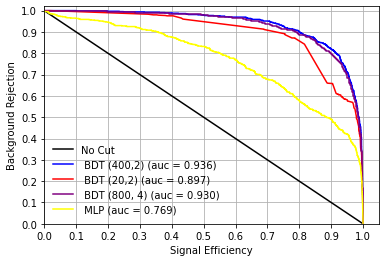

In [28]:
#receiver operating characteristic curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr1, tpr1, thresholds = roc_curve(target_test1, pred_probabilities1)
auc1 = auc(fpr1,tpr1)

pred_probabilities2 = gb_clf2.predict_proba(data_test1)[:,1]
fpr2, tpr2, thresholds = roc_curve(target_test1, pred_probabilities2)
auc2 = auc(fpr2,tpr2)

pred_probabilities3 = gb_clf3.predict_proba(data_test1)[:,1]
fpr3, tpr3, thresholds = roc_curve(target_test1, pred_probabilities3)
auc3 = auc(fpr3,tpr3)

pred_probabilitiesMLP = mlp_clf.predict_proba(data_test1)[:,1]
fprMLP, tprMLP, thresholds = roc_curve(target_test1, pred_probabilitiesMLP)
aucMLP = auc(fprMLP,tprMLP)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr1, tpr1,color='blue')
plt.plot(1-fpr2, tpr2,color='red')
plt.plot(1-fpr3, tpr3,color='purple')
plt.plot(1-fprMLP, tprMLP,color='yellow')


plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(['No Cut',' BDT (400,2) (auc = %0.3f)'%auc1,' BDT (20,2) (auc = %0.3f)'%auc2,' BDT (800, 4) (auc = %0.3f)'%auc3, ' MLP (auc = %0.3f)'%aucMLP], frameon=False, loc='lower left')
plt.grid()
plt.savefig('ROC.png')

ROC curve is a tool to reflect which classifer is better, like the larger the AUC or the curve to the top right is better

## <font color=blue>Tune Model Hyperparameters</font>

##### Before training we need to find hyperparameters that give the best model configuration through a process called hyperparameter tuning. We do this by fitting the model with different combinations of hyperparameters. Often, this process takes quite a long time, however, it depends on the number of hyperparameters you want to tune. For our purposes, we will demonstrate this using a function called GridSearch in scikit-learn.

# THe wuckk

In [1]:
# Perform GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(200,1000,400),
              'learning_rate': np.arange(0.01,0.5,0.1),
              'max_depth': np.arange(1,3)}]

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                       param_grid=param_grid,
                       refit=True,
                       cv=3,
                       scoring ='accuracy',
                       n_jobs=-1)
%time grid_search.fit(data_train1, target_train1.values.ravel()) 
best_score = grid_search.best_score_
best_params = grid_search.best_params_
#results=grid_search.cv_results_
sorted(grid_search.cv_results_.keys())
best_params, best_score
print(grid_search.best_params_)

NameError: name 'np' is not defined

In [30]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.11, max_depth=2, n_estimators=200)